In [5]:
import geopandas as gpd
import numpy as np
import shapely

from spatial_utils.geometric import merge_classified_polygons_by_voting

In [6]:
N_SQUARES = 40
SQUARE_WIDTH = 0.1
N_CLASSES = 4

Create dummy data

<Axes: >

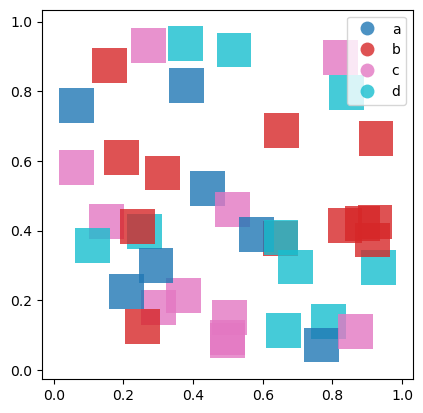

In [7]:
tl_corners = np.random.random((N_SQUARES, 2)) * (1 - SQUARE_WIDTH)
boxes = [
    shapely.box(tl[0], tl[1], tl[0] + SQUARE_WIDTH, tl[1] + SQUARE_WIDTH)
    for tl in tl_corners
]
class_IDs = np.random.randint(0, N_CLASSES, size=N_SQUARES)
class_names = np.array(["abcd"[i] for i in class_IDs])
random_data = np.random.randint(0, N_CLASSES, size=N_SQUARES)

classified_polygons = gpd.GeoDataFrame(
    {
        "geometry": boxes,
        "class_names": class_names,
        "class_IDs": class_IDs,
        "data": random_data,
    },
    crs=3311,
)
classified_polygons.plot("class_names", alpha=0.8, cmap="tab10", legend=True)

/home/exouser/miniconda3/envs/cover-change/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Ties had to be broken for 9.0% of the total predictions


,class_names,geometry
0,b,"MULTIPOLYGON (((0.644 0.326, 0.601 0.326, 0.60..."
1,c,"MULTIPOLYGON (((0.838 0.161, 0.916 0.161, 0.91..."
2,d,"MULTIPOLYGON (((0.608 0.163, 0.708 0.163, 0.70..."
3,a,"MULTIPOLYGON (((0.738 0.122, 0.816 0.122, 0.81..."


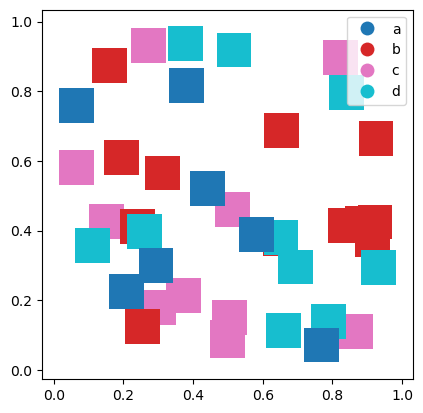

In [8]:
merged = merge_classified_polygons_by_voting(
    classified_polygons=classified_polygons,
    class_column="class_names",
    print_tiebreaking_stats=True,
)
merged.plot("class_names", cmap="tab10", legend=True)
merged